In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

sns.set(font_scale=1.3)
sns.set_style('whitegrid')

In [2]:
df_raw = pd.read_csv('day_wise.csv')

In [3]:
df_raw.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


#### I will select the 'Deaths per 100 cases' column to build the model as it demonstrates the characteristics of a polynomial function.

In [4]:
X = df_raw.index.values
X = X.reshape(-1, 1)
y = df_raw['Deaths / 100 Cases']

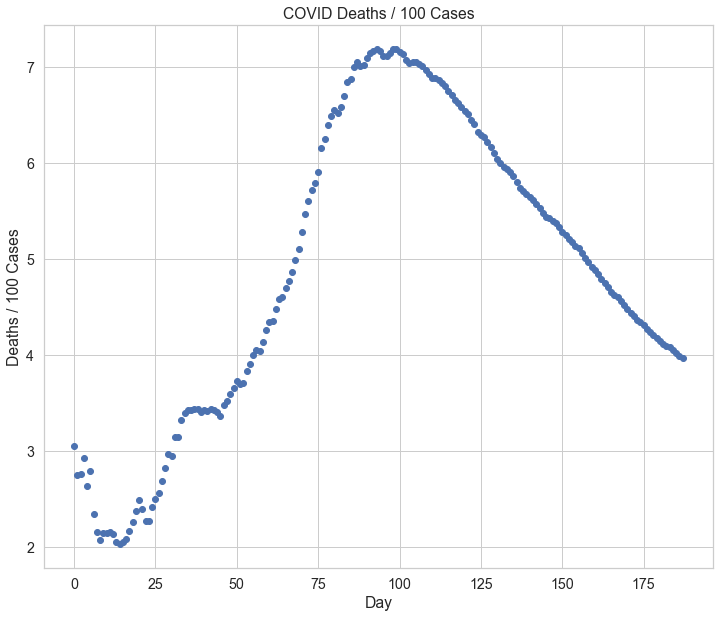

In [22]:
plt.figure(figsize=(12, 10))
plt.title('COVID Deaths / 100 Cases')
plt.xlabel('Day')
plt.ylabel('Deaths / 100 Cases')
plt.scatter(X, y)
plt.show()

### Linear Regression

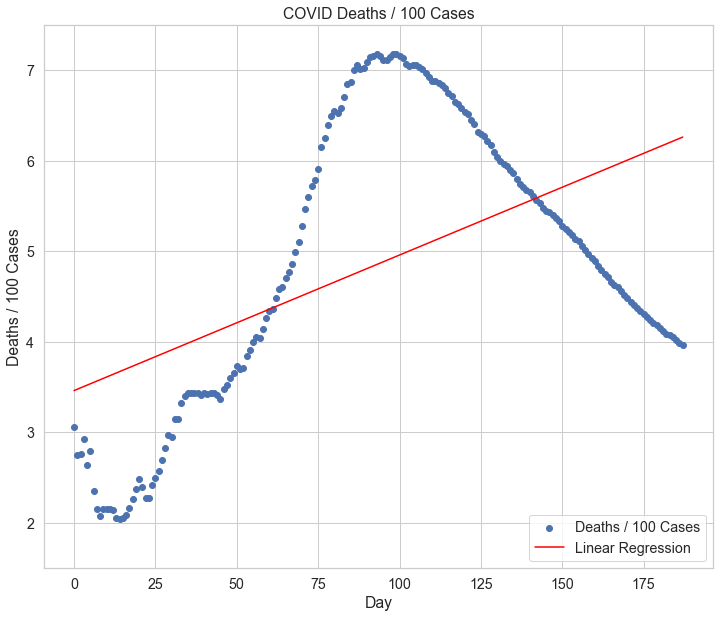

In [6]:
regressor = LinearRegression()
regressor.fit(X, y)
y_lin = regressor.predict(X)

plt.figure(figsize=(12, 10))
plt.title('COVID Deaths / 100 Cases')
plt.xlabel('Day')
plt.ylabel('Deaths / 100 Cases')
plt.scatter(X, y, label='Deaths / 100 Cases')
plt.plot(X, y_lin, label="Linear Regression", c='red')
plt.legend(loc=4)
plt.ylim(1.5, 7.5)
plt.show()

In [7]:
print(f'Linear Regression R2 score: {regressor.score(X, y):.4f}')

Linear Regression R2 score: 0.2657


### Polynomial Regression

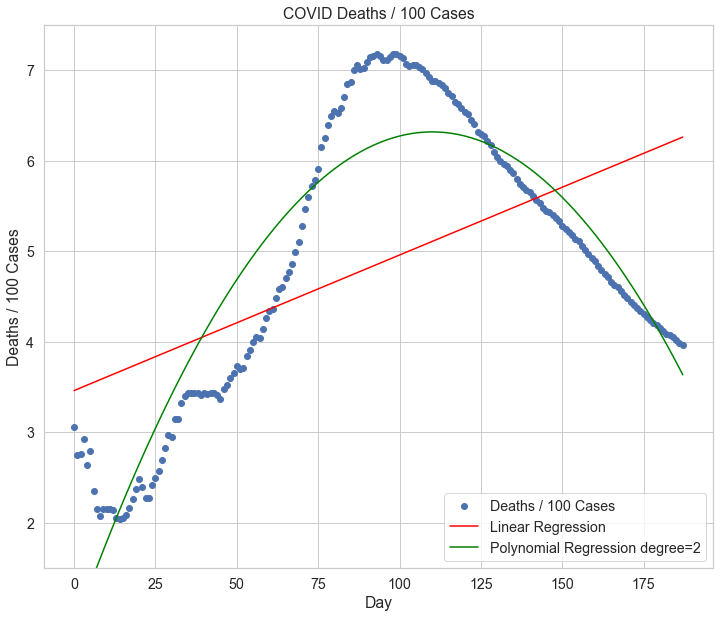

In [8]:
poly2 = PolynomialFeatures(degree=2)

X_poly2 = poly2.fit_transform(X)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly2, y)

y_poly_2 = regressor_poly2.predict(X_poly2)

plt.figure(figsize=(12, 10))
plt.title('COVID Deaths / 100 Cases')
plt.xlabel('Day')
plt.ylabel('Deaths / 100 Cases')
plt.scatter(X, y, label='Deaths / 100 Cases')
plt.plot(X, y_lin, label="Linear Regression", c='red')
plt.plot(X, y_poly_2, label="Polynomial Regression degree=2", c='green')
plt.legend(loc=4)
plt.ylim(1.5, 7.5)
plt.show()

In [9]:
print(f'Polynomial Regression degree=2 R2 score: {regressor_poly2.score(X_poly2, y):.4f}')

Polynomial Regression degree=2 R2 score: 0.8380


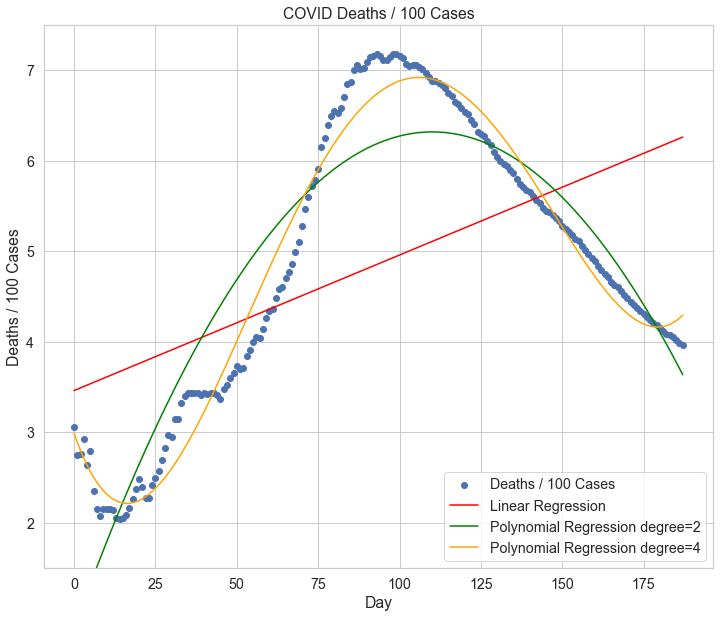

In [10]:
poly4 = PolynomialFeatures(degree=4)

X_poly4 = poly4.fit_transform(X)

regressor_poly4 = LinearRegression()
regressor_poly4.fit(X_poly4, y)

y_poly_4 = regressor_poly4.predict(X_poly4)

plt.figure(figsize=(12, 10))
plt.title('COVID Deaths / 100 Cases')
plt.xlabel('Day')
plt.ylabel('Deaths / 100 Cases')
plt.scatter(X, y, label='Deaths / 100 Cases')
plt.plot(X, y_lin, label="Linear Regression", c='red')
plt.plot(X, y_poly_2, label="Polynomial Regression degree=2", c='green')
plt.plot(X, y_poly_4, label="Polynomial Regression degree=4", c='orange')
plt.legend(loc=4)
plt.ylim(1.5, 7.5)
plt.show()

In [11]:
print(f'Polynomial Regression degree=4 R2 score: {regressor_poly4.score(X_poly4, y):.4f}')

Polynomial Regression degree=4 R2 score: 0.9703


#### Despite the high R-squared value evident in the graph, it's clear that the Polynomial Regression model isn't suitable for predicting the death rate per 100 COVID-19 cases. After 175 days of measurements, the graph of the model clearly changes direction, going upward, while the actual data shows a negative trend. However, it's important to note that this analysis was performed for educational purposes only.

#### I will now search for the most optimal degree of polynomial regression fitted to the current data.

In [15]:
degree, r2, mae_arr, mse_arr, rmse_arr = [], [], [], [], []

for i in range(1, 21):
    polyi = PolynomialFeatures(degree=i)

    X_polyi = polyi.fit_transform(X)

    regressor_polyi = LinearRegression()
    regressor_polyi.fit(X_polyi, y)

    y_poly_i = regressor_polyi.predict(X_polyi)
    
    degree.append(i)
    r2.append(regressor_polyi.score(X_polyi, y))
    mae_arr.append(mae(y, y_poly_i))
    mse_arr.append(mse(y, y_poly_i))
    rmse_arr.append(np.sqrt(mse(y, y_poly_i)))

data={
    'degree': degree,
    'r2_score': r2,
    'MAE': mae_arr,
    'MSE': mse_arr,
    'RMSE': rmse_arr    
    }
results = pd.DataFrame(data)
results.set_index('degree', inplace=True)
results

,r2_score,MAE,MSE,RMSE
degree,,,,
1,0.265738,1.164172,1.822203,1.349890
2,0.838043,0.509342,0.401926,0.633976
3,0.872210,0.486072,0.317134,0.563147
4,0.970343,0.226549,0.073599,0.271292
5,0.970343,0.226797,0.073598,0.271289
6,0.978702,0.178946,0.052856,0.229904
7,0.980185,0.187012,0.049174,0.221751
8,0.981651,0.157822,0.045536,0.213393
9,0.983636,0.145494,0.040611,0.201523


#### Degree 9 appears to be the optimal choice, as it exhibits the highest R-squared value and the lowest RMSE

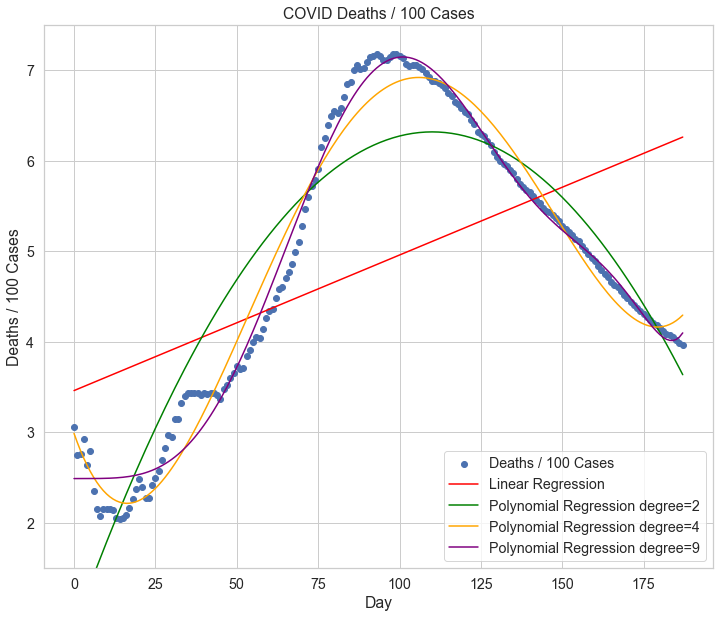

In [19]:
poly9 = PolynomialFeatures(degree=9)

X_poly9 = poly9.fit_transform(X)

regressor_poly9 = LinearRegression()
regressor_poly9.fit(X_poly9, y)

y_poly_9 = regressor_poly9.predict(X_poly9)

plt.figure(figsize=(12, 10))
plt.title('COVID Deaths / 100 Cases')
plt.xlabel('Day')
plt.ylabel('Deaths / 100 Cases')
plt.scatter(X, y, label='Deaths / 100 Cases')
plt.plot(X, y_lin, label="Linear Regression", c='red')
plt.plot(X, y_poly_2, label="Polynomial Regression degree=2", c='green')
plt.plot(X, y_poly_4, label="Polynomial Regression degree=4", c='orange')
plt.plot(X, y_poly_9, label="Polynomial Regression degree=9", c='purple')
plt.legend(loc=4)
plt.ylim(1.5, 7.5)
plt.show()